<a href="https://colab.research.google.com/github/SonNguyen0804/Handwritten_Digit_Recognition/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

**Load and Preprocess the MNIST dataset**

In [2]:
#Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#Normalize pixel value to between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#Reshape the image to include the channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


**Build the CNN model**

In [3]:
model = models.Sequential()

#First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

#Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Flatten the feature maps and add a dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

**Compile the model**

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Train the model**

In [5]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 66s 34ms/step - loss: 0.1608 - accuracy: 0.9498 - val_loss: 0.0507 - val_accuracy: 0.9837
Epoch 2/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0457 - val_accuracy: 0.9863
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.0280 - val_accuracy: 0.9919


**Evaluate the model**

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.0280 - accuracy: 0.9919 - 3s/epoch - 8ms/step
Test accuracy: 0.9919000267982483


**Visualize Training History**

<function matplotlib.pyplot.show(close=None, block=None)>

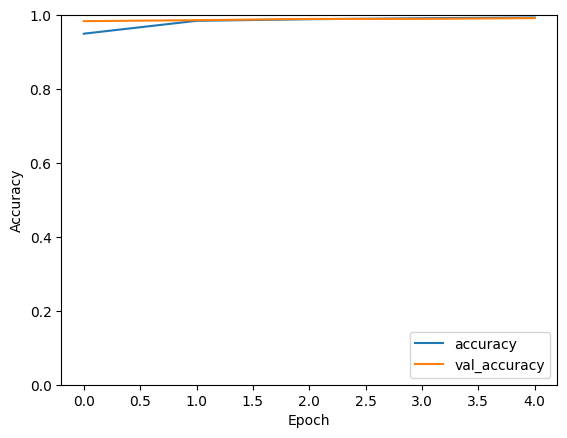

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show